### Импорт библиотек

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [182]:
data = pd.read_csv('houses_to_rent.csv')

In [183]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [184]:
parts = np.split(data, [14], axis=1)
data = parts[0]

In [185]:
data.dtypes

Unnamed: 0        object
city              object
area              object
rooms             object
bathroom          object
parking spaces    object
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [186]:
data.drop(['city','Unnamed: 0', 'furniture'], axis = 1, inplace = True)

In [187]:
le = LabelEncoder()
le.fit(data.animal) 
data.animal = le.transform(data.animal)

In [188]:
data['area'] = data['area'].apply(pd.to_numeric, errors='coerce')
data['rooms'] = data['rooms'].apply(pd.to_numeric, errors='coerce')
data['bathroom'] = data['bathroom'].apply(pd.to_numeric, errors='coerce')
data['parking spaces'] = data['parking spaces'].apply(pd.to_numeric, errors='coerce')
data['floor'] = data['floor'].replace('-', 0)
data['floor'] = data['floor'].apply(pd.to_numeric, errors='coerce')
data['floor'] = data['floor'].replace(0,np.nan)
data['floor'] = data['floor'].fillna(data['floor'].mean())
data['rent amount'] = data['rent amount'].str[2:].replace('\,', '', regex=True)
data['rent amount'] = data['rent amount'].apply(pd.to_numeric, errors='coerce')

data['hoa'] = data['hoa'].str[2:].replace('\,', '', regex=True)
data['hoa'] = data['hoa'].apply(pd.to_numeric, errors='coerce')
data['hoa'] = data['hoa'].replace(0,np.nan)
data['hoa'] = data['hoa'].fillna(data['floor'].mean())

data['property tax'] = data['property tax'].str[2:].replace('\,', '', regex=True)
data['property tax'] = data['property tax'].apply(pd.to_numeric, errors='coerce')
data['property tax'] = data['property tax'].replace(0,np.nan)
data['property tax'] = data['property tax'].fillna(data['floor'].mean())

data['fire insurance'] = data['fire insurance'].str[2:].replace('\,', '', regex=True)
data['fire insurance'] = data['fire insurance'].apply(pd.to_numeric, errors='coerce')

data['total'] = data['total'].str[2:].replace('\,', '', regex=True)
data['total'] = data['total'].apply(pd.to_numeric, errors='coerce')


In [189]:
data.isnull().sum()
# проверим есть ли пропущенные значения

area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            6080 non-null   int64  
 1   rooms           6080 non-null   int64  
 2   bathroom        6080 non-null   int64  
 3   parking spaces  6080 non-null   int64  
 4   floor           6080 non-null   float64
 5   animal          6080 non-null   int32  
 6   hoa             6080 non-null   float64
 7   rent amount     6080 non-null   int64  
 8   property tax    6080 non-null   float64
 9   fire insurance  6080 non-null   int64  
 10  total           6080 non-null   int64  
dtypes: float64(3), int32(1), int64(7)
memory usage: 498.8 KB


In [191]:
data.head()

,area,rooms,bathroom,parking spaces,floor,animal,hoa,rent amount,property tax,fire insurance,total
0,240,3,3,4,7.621436,0,7.621436,8000,1000.0,121,9121
1,64,2,1,1,10.000000,0,540.000000,820,122.0,11,1493
2,443,5,5,4,3.000000,0,4172.000000,7000,1417.0,89,12680
3,73,2,2,1,12.000000,0,700.000000,1250,150.0,16,2116
4,19,1,1,0,7.621436,1,7.621436,1200,41.0,16,1257


<AxesSubplot:>

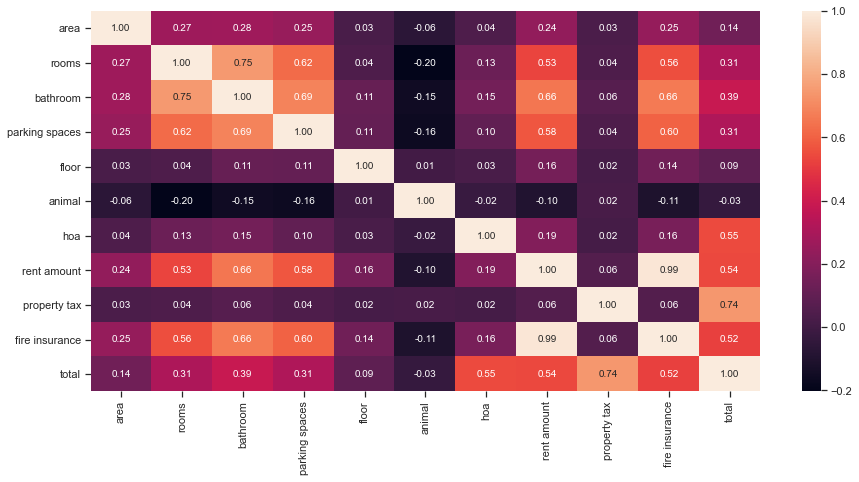

In [192]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [193]:
X = data.drop(['total'], axis = 1)
Y = data.total
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    area  rooms  bathroom  parking spaces      floor  animal          hoa  \
0   240      3         3               4   7.621436       0     7.621436   
1    64      2         1               1  10.000000       0   540.000000   
2   443      5         5               4   3.000000       0  4172.000000   
3    73      2         2               1  12.000000       0   700.000000   
4    19      1         1               0   7.621436       1     7.621436   

   rent amount  property tax  fire insurance  
0         8000        1000.0             121  
1          820         122.0              11  
2         7000        1417.0              89  
3         1250         150.0              16  
4         1200          41.0              16   

Выходные данные:

 0     9121
1     1493
2    12680
3     2116
4     1257
Name: total, dtype: int64


In [194]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       area  rooms  bathroom  parking spaces  floor  animal    hoa  \
6065   133      2         2               1    7.0       0  813.0   
2207    44      1         1               1    6.0       1  571.0   
1277    85      2         1               0    4.0       0  620.0   
3847    79      3         2               2    3.0       0  995.0   
1299    52      2         1               1    8.0       0  760.0   

      rent amount  property tax  fire insurance  
6065         2713    160.000000              35  
2207         2000    130.000000              26  
1277         2190      7.621436              28  
3847         2200    146.000000              28  
1299         3000    145.000000              39   

Входные параметры тестовой выборки:

       area  rooms  bathroom  parking spaces     floor  animal          hoa  \
1430    19      1         1               0  7.621436       1     7.621436   
3875    54      2         1               1  3.000

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [196]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, lr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, lr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, lr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, lr_y_pred))

Средняя абсолютная ошибка: 4.587720001131204
Средняя квадратичная ошибка: 290.2656894440338
Median absolute error: 3.1786169657086703
Коэффициент детерминации: 0.9999856427207927


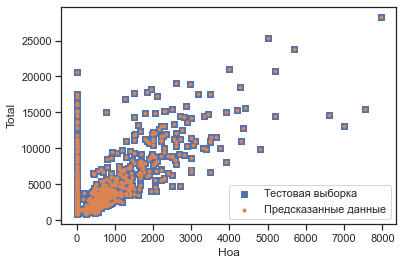

In [204]:
plt.scatter(X_test.hoa, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.hoa, lr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Hoa')
plt.ylabel ('Total')
plt.show()

In [205]:
from sklearn.ensemble import RandomForestRegressor

In [206]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [207]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 61.89769736842104
Средняя квадратичная ошибка: 60529.15072368422
Median absolute error: 17.700000000000045
Коэффициент детерминации: 0.9970060742667093


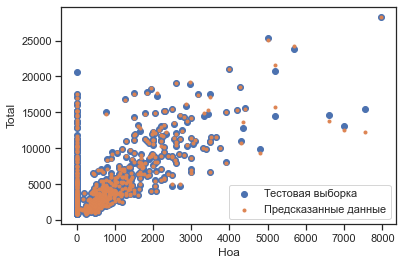

In [208]:
plt.scatter(X_test.hoa, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.hoa, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Hoa')
plt.ylabel('Total')
plt.show()

In [ ]:
# The end.